# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.

* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.



In [34]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
from tensorflow.keras.datasets import fashion_mnist

In [36]:
# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [37]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [38]:
# Check the shape of the single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

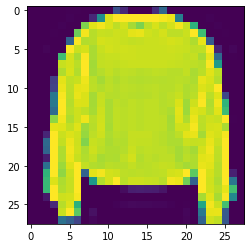

In [39]:
# Plot a single sample
plt.imshow(train_data[7]);

In [40]:
# Check out samples label
train_labels[7]

2

In [41]:
# Create a small list so we can index onto our training labels so they're human-readble
class_names =["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Bag')

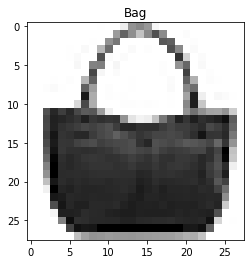

In [42]:
# Plot an example image and its label
index_of_choice = 100
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

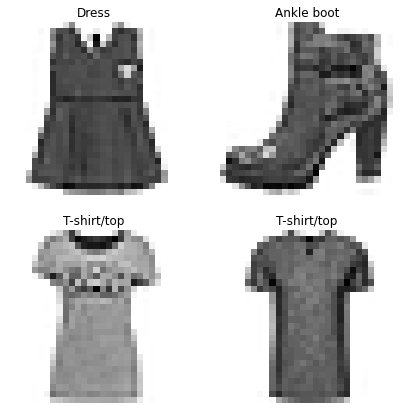

In [43]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = `tf.keras.losses.CategoricalCrossentropy()`
    * If your labels are one-hot encoded, use `CategoricalCrossentropy()`
    * If your labels are nteger form use `SparseCategoricalCrossentropy()`
* Output layer activation = Softmax (not Sigmoid)

In [49]:
# our data needs to be flattened (from 28*28 to None, 784)

flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [50]:
28 * 28

784

In [70]:
# Building the model

# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")])

In [71]:
# 2. Compile the model
model_13.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=tf.keras.metrics.Accuracy())

In [72]:
# 3. Fit the model
non_norm_history = model_13.fit(train_data,
                               tf.one_hot(train_labels, depth=10),
                               epochs=10,
                               validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1629 - accuracy: 0.0073 - val_loss: 1.8070 - val_accuracy: 0.0303
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7039 - accuracy: 0.0311 - val_loss: 1.6755 - val_accuracy: 0.0560
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6331 - accuracy: 0.0517 - val_loss: 1.6065 - val_accuracy: 0.0546
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6032 - accuracy: 0.0592 - val_loss: 1.6056 - val_accuracy: 0.0598
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.0619 - val_loss: 1.6016 - val_accuracy: 0.0794
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5913 - accuracy: 0.0728 - val_loss: 1.5698 - val_accuracy: 0.0559
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5738 - accuracy: 0.0593 - val_loss: 1.5715 - val_accuracy: